In [1]:
import numpy as np
import json

In [2]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
root_folder = '/home/data/lyt/Visual7W'
img_folder = '{}/images'.format(root_folder)

In [4]:
anno_point_file = '{}/v7w_{}_answers.json'.format(root_folder, 'pointing')
anno_tell_file  = '{}/v7w_{}_answers.json'.format(root_folder, 'telling')
ques_point_file = '{}/dataset_v7w_{}.json'.format(root_folder, 'pointing')
ques_tell_file  = '{}/dataset_v7w_{}.json'.format(root_folder, 'telling')

In [5]:
anno_point = json.load(open(anno_point_file, 'r'))
anno_tell  = json.load(open(anno_tell_file, 'r'))
ques_point = json.load(open(ques_point_file, 'r'))
ques_tell  = json.load(open(ques_tell_file, 'r'))

In [12]:
#===============ques_point================

In [23]:
print(ques_point.keys())
print('dataset: {}'.format(ques_point['dataset']))
print('version: {}'.format(ques_point['version']))
imges = ques_point['images']
boxes = ques_point['boxes']
print('#imges: {}'.format(len(imges)))
print('#boxes: {}'.format(len(boxes)))

dict_keys(['images', 'boxes', 'version', 'dataset'])
dataset: Visual7W-pointing
version: 1.0
#imges: 25733
#boxes: 308407


In [24]:
box = np.random.choice(boxes)
print(box.keys())
for k in box.keys():
    print('{}: {}'.format(k, box[k]))

box_dict = {}
for box in boxes:
    box_id = box['box_id']
    if box_id not in box_dict:
        box_dict[box_id] = {'cls': box['name'],
                         'h': box['height'],
                         'w': box['width'],
                         'x': box['x'],
                         'y': box['y']}

dict_keys(['box_id', 'name', 'height', 'width', 'y', 'x'])
box_id: 795214
name: planks
height: 79
width: 213
y: 174
x: 113


dict_keys(['qa_pairs', 'image_id', 'split', 'filename'])
image_id: 2413982
split: train
filename: v7w_2413982.jpg
#qa_pairs: 9
qa_pairs[0]: {'answer': 162186, 'multiple_choices': [162184, 162181, 162183], 'qa_id': 137039, 'type': 'which', 'question': 'Which vehicle is being driven by a woman in an orange shirt?'}
qa_pairs[1]: {'answer': 162180, 'multiple_choices': [129452, 129453, 129446], 'qa_id': 332857, 'type': 'which', 'question': 'Which man walk left of the umbrella?'}
Which vehicle is being driven by a woman in an orange shirt?
√golf cart
×blazer
×man
×blazer


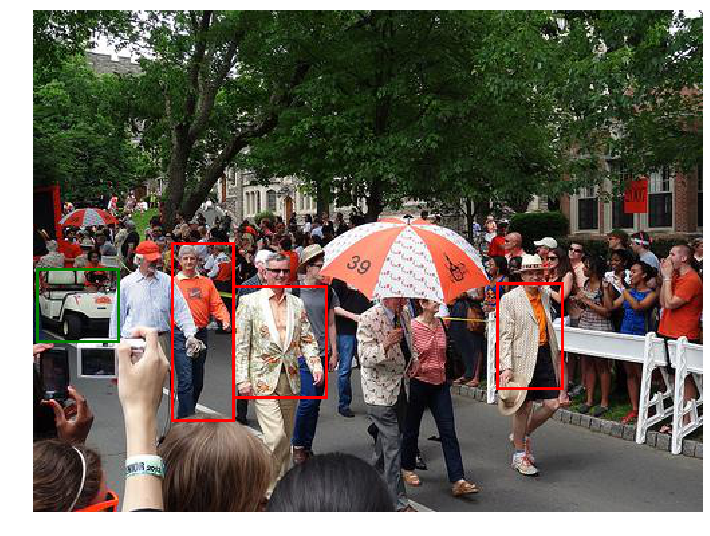

Which man walk left of the umbrella?
√man
×blazer
×blazer
×woman


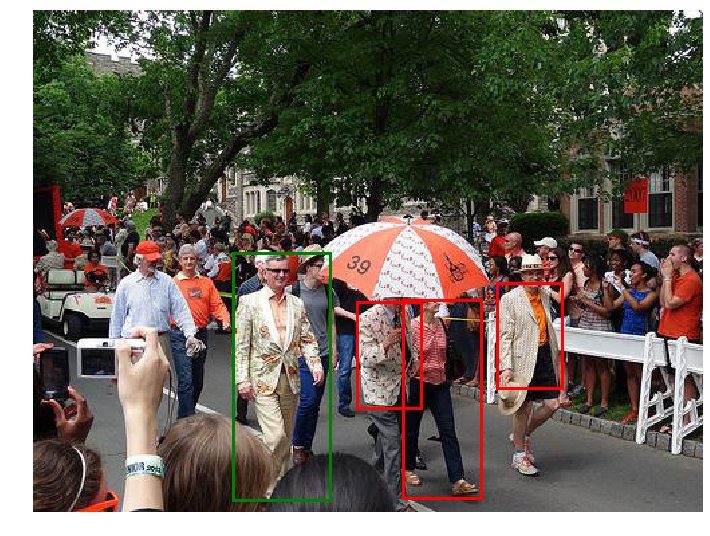

Which jacket has a floral print?
√blazer
×barricade
×man
×blazer


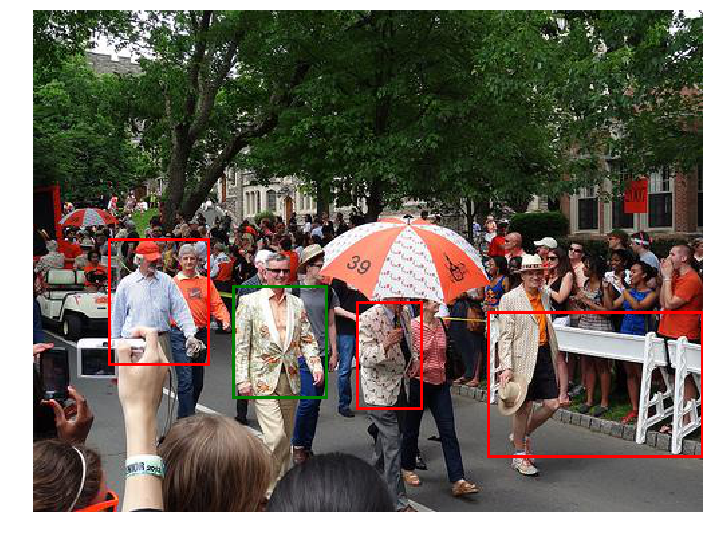

Which person is wearing beige pants?
√man
×man
×umbrella
×man


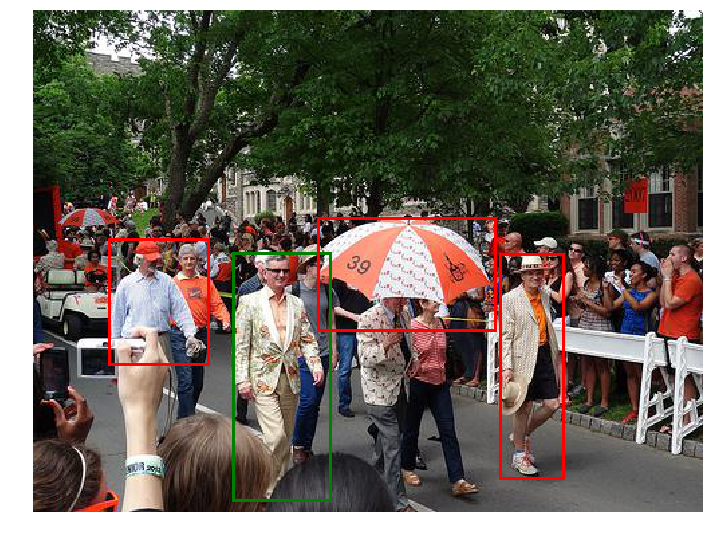

Which person is wearing a brimmed hat?
√man
×barricade
×blazer
×man


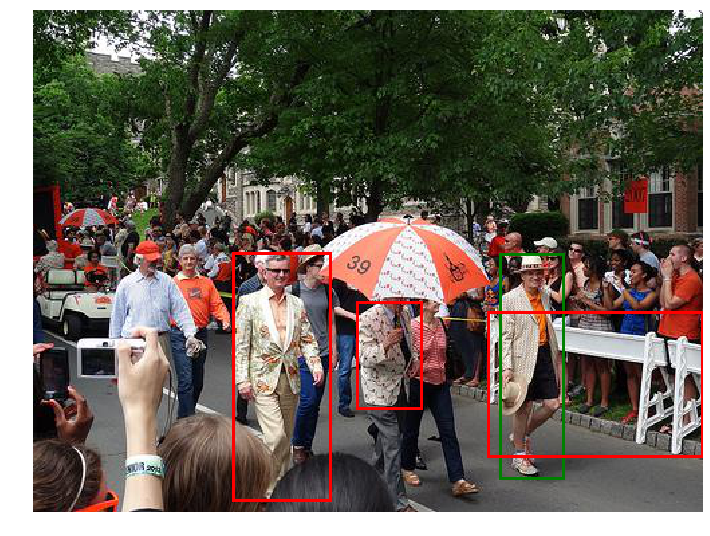

Which object is holding the people on the sidelines from entering the parade?
√barricade
×man
×blazer
×golf cart


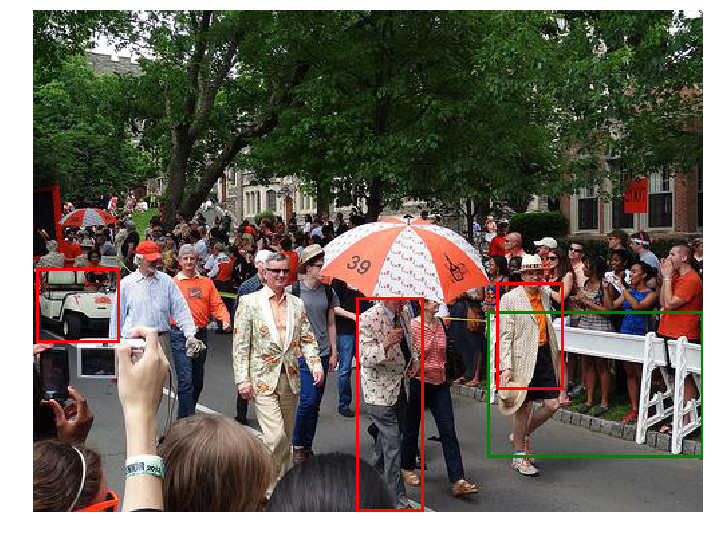

Which person is wearing orange and wearing a hat?
√man
×blazer
×man
×barricade


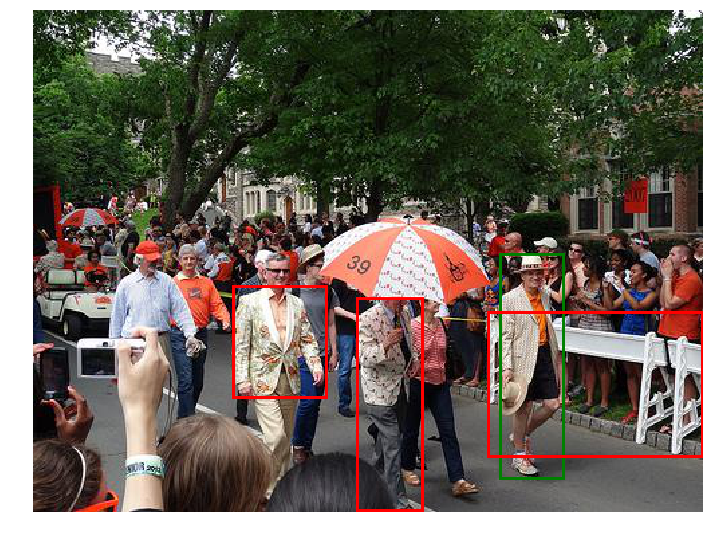

Which part of the picture contains a barrier between those on the sidewalk and those on the street?
√barricade
×blazer
×man
×golf cart


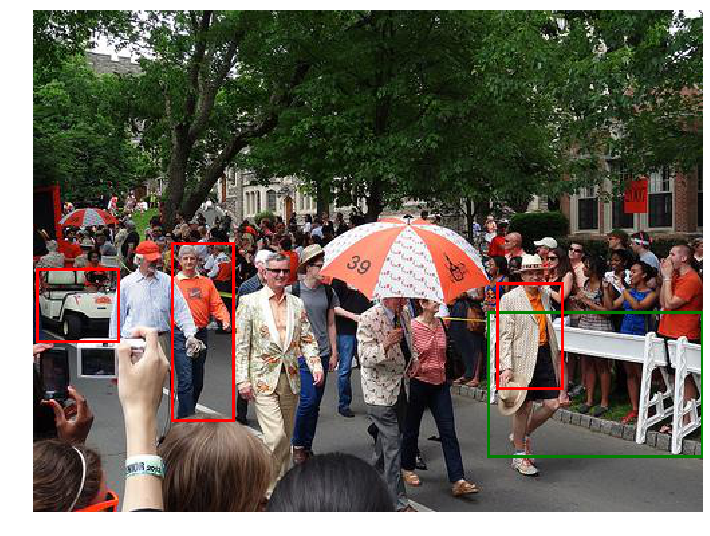

Which umbrella is open in the air?
√umbrella
×woman
×blazer
×blazer


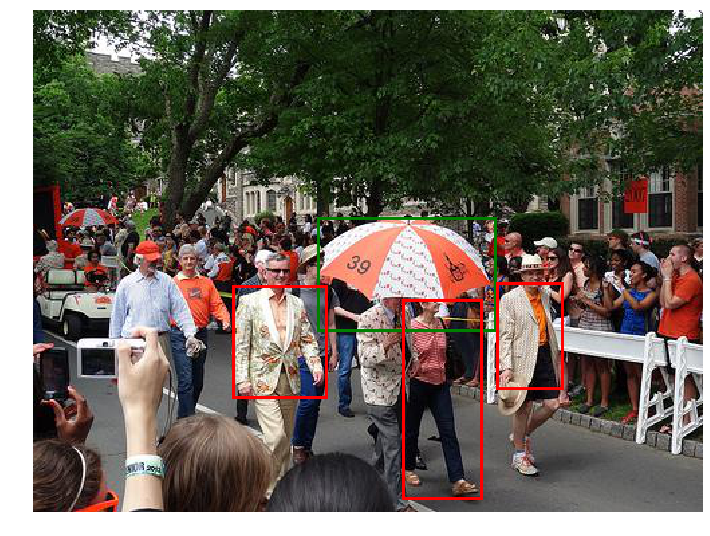

In [89]:
im = np.random.choice(imges)
print(im.keys())
for k in im.keys():
    if k != 'qa_pairs':
        print('{}: {}'.format(k, im[k]))
print('===========================')
print('#qa_pairs: {}'.format(len(im['qa_pairs'])))
print('qa_pairs[{}]: {}'.format(0, im['qa_pairs'][0]))
if len(im['qa_pairs']) > 1:
    print('qa_pairs[{}]: {}'.format(1, im['qa_pairs'][1]))
print('===========================')
img = imread('{}/{}'.format(img_folder, im['filename']))
# print(img.shape)
for qa in im['qa_pairs']:
    fig,ax = plt.subplots(figsize=(12, 12))
    ax.imshow(img)
    ques = qa['question']
    print(ques)
    ans_box_id = qa['answer']
    cls = box_dict[ans_box_id]['cls']
    print('√{}'.format(cls))
    loc = (box_dict[ans_box_id]['x'], box_dict[ans_box_id]['y'])
    w, h = box_dict[ans_box_id]['w'], box_dict[ans_box_id]['h']
    ax.add_patch(Rectangle(loc, w, h, linewidth=3,edgecolor='g',facecolor='none'))
    other_box_ids = qa['multiple_choices']
    for obox_id in other_box_ids:
        cls = box_dict[obox_id]['cls']
        print('×{}'.format(cls))
        loc = (box_dict[obox_id]['x'], box_dict[obox_id]['y'])
        w, h = box_dict[obox_id]['w'], box_dict[obox_id]['h']
        ax.add_patch(Rectangle(loc, w, h, linewidth=3,edgecolor='r',facecolor='none'))
    plt.axis('off')
    plt.show()

In [90]:
#===============ques_tell================

In [91]:
print(ques_tell.keys())
print('dataset: {}'.format(ques_tell['dataset']))
print('version: {}'.format(ques_tell['version']))
imges = ques_tell['images']
print('#imges: {}'.format(len(imges)))

dict_keys(['images', 'version', 'dataset'])
dataset: Visual7W-telling
version: 1.1
#imges: 28653


dict_keys(['qa_pairs', 'image_id', 'split', 'filename'])
image_id: 2352582
split: train
filename: v7w_2352582.jpg
#qa_pairs: 4
qa_pairs[0]: {'image_id': 2352582, 'question': 'Why is the sand flying around his feet?', 'multiple_choices': ['He is jumping.', "He's biking.", "He's riding a scooter."], 'qa_id': 257553, 'answer': "He's running.", 'type': 'why'}
qa_pairs[1]: {'image_id': 2352582, 'question': 'What kind of animal is this?', 'multiple_choices': ['Cat.', 'Hippo.', 'Elephant.'], 'qa_id': 257552, 'answer': 'Dog.', 'type': 'what'}


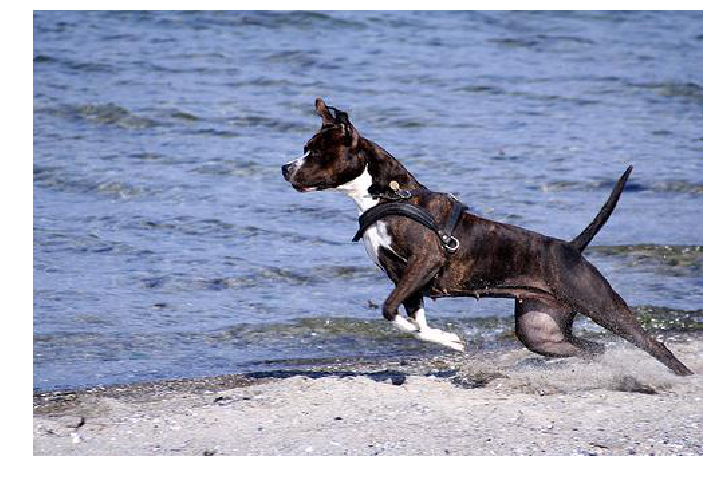

Why is the sand flying around his feet?
√He's running.
×He is jumping.
×He's biking.
×He's riding a scooter.
What kind of animal is this?
√Dog.
×Cat.
×Hippo.
×Elephant.
Where was this taken?
√At the beach.
×In downtown.
×At the sea.
×At the ocean.
What is in the background?
√Waves of water.
×A lighthouse.
×Sand.
×Trees.


In [113]:
im = np.random.choice(imges)
print(im.keys())
for k in im.keys():
    if k != 'qa_pairs':
        print('{}: {}'.format(k, im[k]))
print('===========================')
print('#qa_pairs: {}'.format(len(im['qa_pairs'])))
j = 0
print('qa_pairs[{}]: {}'.format(j, im['qa_pairs'][j]))
j = 1
print('qa_pairs[{}]: {}'.format(j, im['qa_pairs'][j]))
img = imread('{}/{}'.format(img_folder, im['filename']))
# print(img.shape)
fig,ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
plt.axis('off')
plt.show()
for qa in im['qa_pairs']:
    ques = qa['question']
    print(ques)
    gt_ans = qa['answer']
    other_ans = qa['multiple_choices']
    print('√{}'.format(gt_ans))
    for o_ans in other_ans:
        print('×{}'.format(o_ans))